# Yapay Öğrenme Uygulaması

Titanic Verisi
 - https://www.kaggle.com/c/titanic/data

Sevgili öğrenncimiz Nadin'in çalışması
 - https://www.kaggle.com/nadintamer/titanic-survival-predictions-beginner

Amac

> Sag kalan ve kalamayan Titanic yolcularina ait train verisine bakarak, test verisindeki yolcularin sag kalip kalamadigini tahmin etmek.
 


## Veriyi Anlama

In [1]:
# Kutuphaneler
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

# Veri Yukleme
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

# Veriye goz atma
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


![data/kaggle-titanic.png](data/kaggle-titanic.png)

In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [3]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Veriyi Filtreleme

In [4]:
train[['Name', 'Age']].head(3)

,Name,Age
0,"Braund, Mr. Owen Harris",22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
2,"Heikkinen, Miss. Laina",26.0


In [5]:
train.loc[0:3,['Name', 'Age', 'Pclass', 'Survived']]

,Name,Age,Pclass,Survived
0,"Braund, Mr. Owen Harris",22.0,3,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,1
2,"Heikkinen, Miss. Laina",26.0,3,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,1


In [6]:
sag, N = len(train[train['Survived'] == 1]), len(train)
print("Sag kalan:", sag)
print("Toplam yolcu:", N)
print("Sag kalma orani:", sag/N)

Sag kalan: 342
Toplam yolcu: 891
Sag kalma orani: 0.3838383838383838


In [7]:
erkek_indis, kadin_indis = train['Sex'] == 'male', train['Sex'] == 'female'
sum(erkek_indis), sum(kadin_indis)

(577, 314)

In [8]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [9]:
erkek_Sag, erkek_N = sum(train['Survived'][erkek_indis]), len(train['Survived'][erkek_indis])
erkek_Sag, erkek_N, erkek_Sag/erkek_N

(109, 577, 0.18890814558058924)

In [10]:
kadin_Sag, kadin_N = sum(train['Survived'][kadin_indis]), len(train['Survived'][kadin_indis])
kadin_Sag, kadin_N, kadin_Sag/kadin_N

(233, 314, 0.7420382165605095)

In [11]:
cocuk_indis = train['Age'] < 18
cocuk_Sag, cocuk_N = sum(train['Survived'][cocuk_indis]), len(train['Survived'][cocuk_indis])
cocuk_Sag, cocuk_N, cocuk_Sag/cocuk_N

(61, 113, 0.5398230088495575)

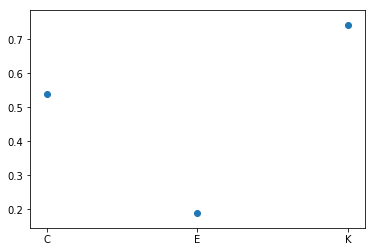

In [12]:
plt.scatter(["E", "K","C"],[erkek_Sag/erkek_N, kadin_Sag/kadin_N,cocuk_Sag/cocuk_N])

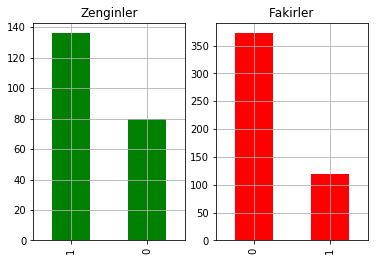

In [13]:
fakir_indis, zengin_indis = train.Pclass == 3, train.Pclass == 1

plt.subplot(1, 2, 1)
train[zengin_indis].Survived.value_counts().plot(kind = 'bar', color = 'g')
plt.title("Zenginler")
plt.grid()

plt.subplot(1, 2, 2)
train[fakir_indis].Survived.value_counts().plot(kind = 'bar', color = 'r')
plt.title("Fakirler")
plt.grid()


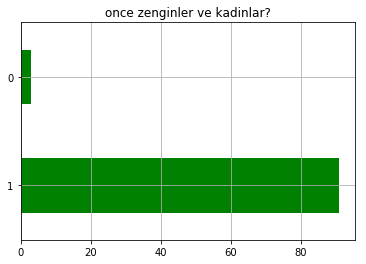

In [14]:
# once zenginler ve kadinlar?
train[(train.Pclass == 1) & (train.Sex == 'female')].Survived.value_counts().plot(kind = 'barh', color = 'g')
plt.title("once zenginler ve kadinlar?")
plt.grid()

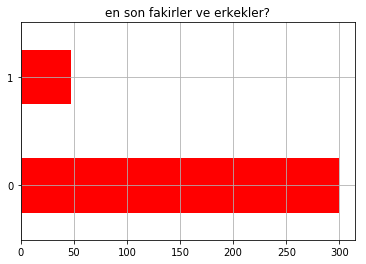

In [15]:
# en son fakirler ve erkekler?
train[(train.Pclass == 3) & (train.Sex == 'male')].Survived.value_counts().plot(kind = 'barh', color = 'r')
plt.title("en son fakirler ve erkekler?")
plt.grid()


## Veri Onislemleri

In [16]:
train.Sex.head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

#### Sayisallastrima


In [17]:
def sayisallastir(x):
    if x == 'male' : return 1
    else: return 0

In [18]:
train.Sex = train.Sex.apply(sayisallastir)
train.Sex.head()

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int64

#### Kayip Degerler

In [19]:
train[train.Age.isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",1,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",0,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",1,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",0,NaN,0,0,330959,7.8792,NaN,Q


In [20]:
print(pd.isnull(train).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [21]:
train['Age'] = train['Age'].fillna(np.mean(train['Age']))
train['Fare'] = train['Fare'].fillna(np.mean(train['Fare']))

#### Onemli Ozellik (feature) Secimi

In [22]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [23]:
train = train[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]

## Model kurma: Karar Agaclari

In [24]:
X = train.drop('Survived', axis = 1)
y = train['Survived']

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [26]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Model Degerlendirme

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [28]:
print('Train Dogrulugu: ', accuracy_score(y_train, classifier.predict(X_train)))
print('test Dogrulugu:', accuracy_score(y_test, classifier.predict(X_test)))

Train Dogrulugu:  0.9798657718120806
test Dogrulugu: 0.7457627118644068


In [29]:
classifier = DecisionTreeClassifier(max_depth = 3)
classifier.fit(X_train, y_train)

print('train Dogrulugu:' , accuracy_score(y_train, classifier.predict(X_train)))
print('test Dogrulugu:', accuracy_score(y_test, classifier.predict(X_test)))

train Dogrulugu: 0.8238255033557047
test Dogrulugu: 0.8203389830508474


In [30]:
#confusion metices
print("Confusion Metrices: \n {0}".format(confusion_matrix(y_test, classifier.predict(X_test))))

Confusion Metrices: 
 [[157  18]
 [ 35  85]]


## Model Kurma: Lojistik Regresyon

In [31]:
#import logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [32]:
print('train Dogrulugu:' , accuracy_score(y_train, lr.predict(X_train)))
print('test Dogrulugu:', accuracy_score(y_test, lr.predict(X_test)))

train Dogrulugu: 0.7969798657718121
test Dogrulugu: 0.8067796610169492


In [33]:
#confusion metices
print("Confusion Metrices: \n {0}".format(confusion_matrix(y_test, lr.predict(X_test))))

Confusion Metrices: 
 [[154  21]
 [ 36  84]]


In [34]:
lr.coef_

array([[-0.62435455, -2.34648148, -0.01975259, -0.27078799, -0.11671273,
         0.00623924]])

In [35]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [36]:
coeff_df = pd.DataFrame(train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(lr.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
5,Fare,0.006239
2,Age,-0.019753
4,Parch,-0.116713
3,SibSp,-0.270788
0,Pclass,-0.624355
1,Sex,-2.346481


## Yeni Bir Model ile Calisma
Yapay Sinir Aglari
 - http://stackabuse.com/introduction-to-neural-networks-with-scikit-learn/